In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os
import matplotlib.pyplot as plt
from model import create_model 

In [ ]:
# ⚡ المسار الرئيسي للداتا
dataset_dir = r"G:/IT/Year4/Graduation Project/AI/Model"

# ⚡ تحديد حجم الصور والـ Batch Size
img_size = (224, 224)
batch_size = 32


In [27]:
# ⚡ إعداد Augmentation للبيانات
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=(0.8, 1.2),
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# ⚡ تحميل بيانات التدريب
train_data = train_datagen.flow_from_directory(
    dataset_dir + "/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_data = val_test_datagen.flow_from_directory(
    dataset_dir + "/val",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_data = val_test_datagen.flow_from_directory(
    dataset_dir + "/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 12594 images belonging to 3 classes.
Found 2699 images belonging to 3 classes.
Found 2699 images belonging to 3 classes.


In [28]:
# ⚡ إنشاء الموديل
model = create_model(input_shape=(224, 224, 3), num_classes=3)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     8,028,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,286,659 (39.24 MB)

 Trainable params: 8,028,675 (30.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [29]:
# ⚡ Callbacks لتحسين التدريب
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint(r"G:/Models/iRecycle detection/best_model.keras", save_best_only=True, monitor="val_accuracy")

In [30]:
# ⚡ تدريب الموديل
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# ⚡ حفظ الموديل النهائي
model.save(r"G:/Models/iRecycle detection/final_model.keras")
print("✅ Model Saved Successfully!")

Epoch 1/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 320s 803ms/step - accuracy: 0.7093 - loss: 2.4623 - val_accuracy: 0.9011 - val_loss: 0.2753 - learning_rate: 0.0010
Epoch 2/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 404s 1s/step - accuracy: 0.8605 - loss: 0.3845 - val_accuracy: 0.9000 - val_loss: 0.2650 - learning_rate: 0.0010
Epoch 3/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 315s 800ms/step - accuracy: 0.8553 - loss: 0.3716 - val_accuracy: 0.8959 - val_loss: 0.2682 - learning_rate: 0.0010
Epoch 4/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 315s 799ms/step - accuracy: 0.8637 - loss: 0.3428 - val_accuracy: 0.9170 - val_loss: 0.2278 - learning_rate: 0.0010
Epoch 5/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 314s 798ms/step - accuracy: 0.8788 - loss: 0.3193 - val_accuracy: 0.9181 - val_loss: 0.2312 - learning_rate: 0.0010
Epoch 6/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 314s 797ms/step - accuracy: 0.8859 - loss: 0.2938 - val_accuracy: 0.9240 - val_loss: 0.2116 - learning_rate: 0.0010
Epoch 7/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 313s 794ms/step - accuracy:

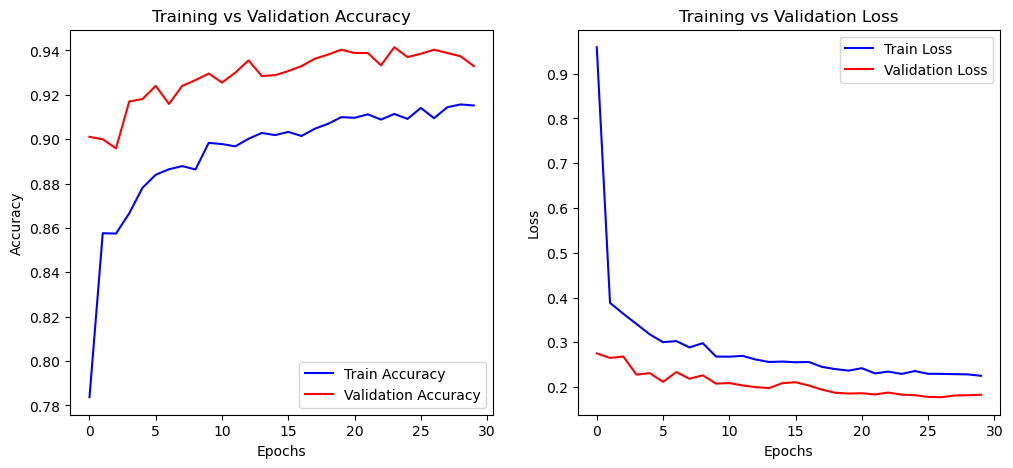

In [31]:
# ⚡ دالة لعرض منحنيات التدريب
def plot_training(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    
    plt.show()

plot_training(history)

In [33]:
# ⚡ اختبار الموديل
best_model = tf.keras.models.load_model(r"G:/Models/iRecycle detection/best_model.keras")
test_loss, test_accuracy = best_model.evaluate(test_data)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")


85/85 ━━━━━━━━━━━━━━━━━━━━ 38s 434ms/step - accuracy: 0.9239 - loss: 0.2113
✅ Test Accuracy: 91.66%
